Расстояние между вторым и первым пиком 11999999.999999106
Расстояние между третьим и вторым пиком 11999999.999999091
Среднее межмодовое расстояние в МГц 12.0
FWHM в МГЦ для первого пика: 2
FWHM в МГЦ для второго пика: 2
FWHM в МГЦ для третьего пика: 2


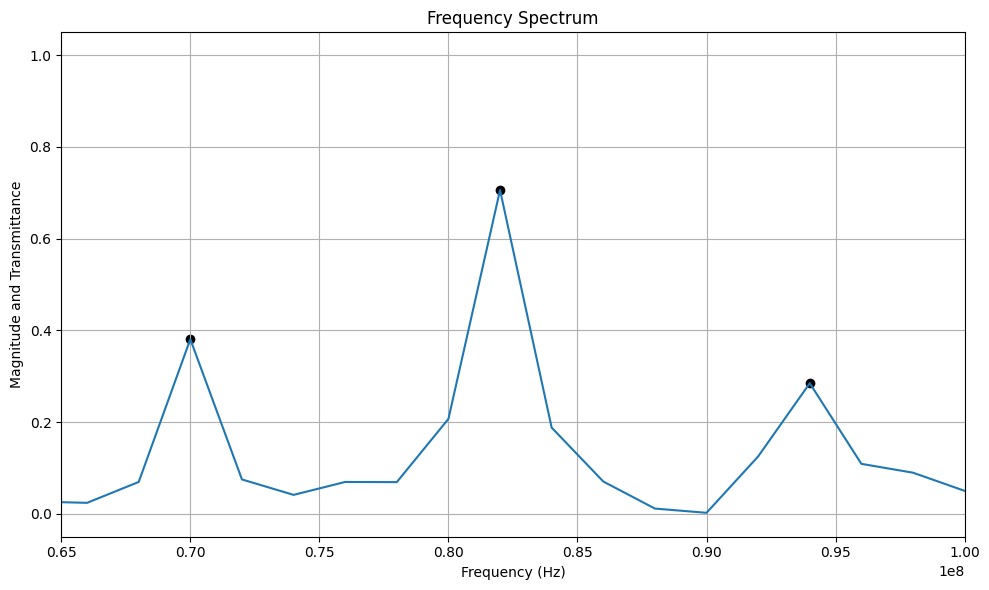

In [1]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import find_peaks
df = pd.read_csv('praktik6.csv')
spectr1 = np.array(df.iloc[:,0])
Spectr1 = np.array(df.iloc[:,1])
dt = spectr1[1] - spectr1[0]
fft_signal = np.fft.fft(Spectr1)
fft_signal = fft_signal[:len(fft_signal)//2-1]
freq = np.fft.fftfreq(len(Spectr1), d = dt)
freq = freq[freq>0]
fft_signal_norm = abs(fft_signal)/max(abs(fft_signal))

peaks, _ = find_peaks(abs(fft_signal_norm)) # Поиск индексов всех пиков
max_peaks = []
for i in range(len(peaks)): # Поиск пиков из нужного диапазона
    if (freq[peaks[i]] > 0.65e8) and (freq[peaks[i]] < 0.95e8): 
        max_peaks.append((freq[peaks[i]], abs(fft_signal_norm[peaks[i]])))
max_peaks.pop(1) #Удаление пика присущего шуму
#Поиск межмодового расстояния
print("Расстояние между вторым и первым пиком",max_peaks[1][0] - max_peaks[0][0])
print("Расстояние между третьим и вторым пиком",max_peaks[2][0] - max_peaks[1][0])
print("Среднее межмодовое расстояние в МГц", round(max_peaks[1][0] - max_peaks[0][0] + max_peaks[2][0] - max_peaks[1][0])/2 * 1e-6)

#Поиск FWHM
half_max_amplitude_first_peak = max_peaks[0][1]/2 # max_peaks[i][j], i - номер номер строки, j - номер столбца
half_max_amplitude_second_peak = max_peaks[1][1]/2
half_max_amplitude_third_peak = max_peaks[2][1]/2
#print(half_max_amplitude_third_peak)
crossings = []
crossings_2 = []
crossings_3 = []
for i in range(len(freq)):
    if (freq[i] > 0.65e8) and (freq[i] < 0.73e8):
        if (abs(fft_signal_norm[i]) - half_max_amplitude_first_peak) * (abs(fft_signal_norm[i-1]) - half_max_amplitude_first_peak) <= 0:
            crossings.append((freq[i], abs(fft_signal_norm[i])))
    if (freq[i] > 0.75e8) and (freq[i] < 0.85e8):
        if (abs(fft_signal_norm[i]) - half_max_amplitude_second_peak) * (abs(fft_signal_norm[i-1]) - half_max_amplitude_second_peak) <= 0:
            crossings_2.append((freq[i], abs(fft_signal_norm[i])))
    if (freq[i] > 0.86e8) and (freq[i] < 0.98e8):
        if (abs(fft_signal_norm[i]) - half_max_amplitude_third_peak) * (abs(fft_signal_norm[i-1]) - half_max_amplitude_third_peak) <= 0:
            crossings_3.append((freq[i], abs(fft_signal_norm[i])))
    if i == len(freq)-1:
        fwhm = abs(crossings[1][0] - crossings[0][0])
        print(f"FWHM в МГЦ для первого пика: {fwhm/1e6:.0f}")
    if i == len(freq)-1:
        fwhm = abs(crossings_2[1][0] - crossings_2[0][0])
        print(f"FWHM в МГЦ для второго пика: {fwhm/1e6:.0f}")
    if i == len(freq)-1:
        fwhm = abs(crossings_3[1][0] - crossings_3[0][0])
        print(f"FWHM в МГЦ для третьего пика: {fwhm/1e6:.0f}")

plt.figure(figsize = (10,6))
plt.plot(freq, np.abs(fft_signal_norm))
plt.scatter( [c[0] for c in max_peaks],[c[1] for c in max_peaks], color='k')  # точки пересечения
plt.xlim(65e6, 100e6)  # отображение только положительных частот
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude and Transmittance')
plt.title('Frequency Spectrum')
plt.grid(True)
plt.tight_layout()
plt.show()

FWHM в ГГЦ: 0.17700017699983214
FSR в ГГЦ: 97.95409795390204


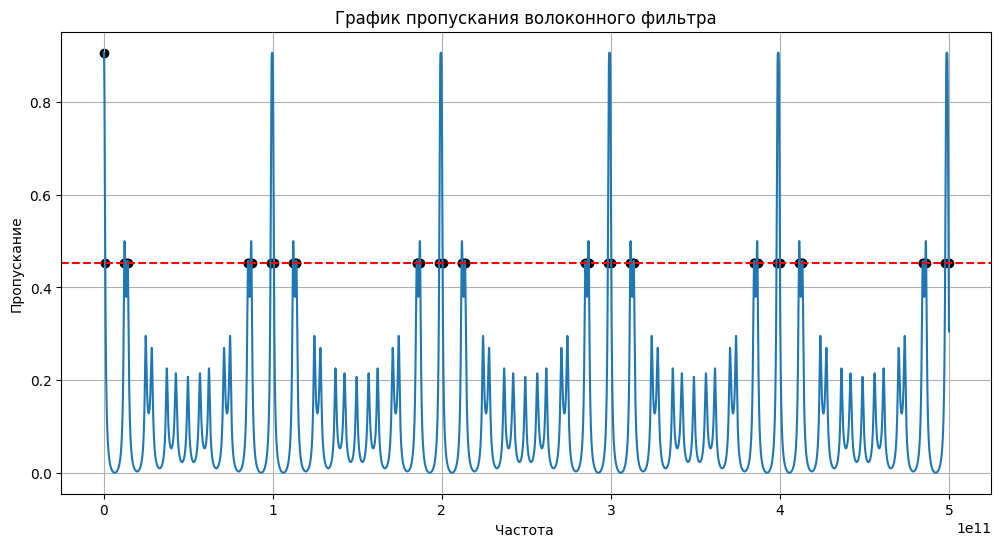

In [32]:
import math
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import find_peaks
#%matplotlib qt 
freq = np.linspace(1.0, 5*10e10, 1000000 )

k1 = k3 = 0.38
k2 = 0.065
l = 14.42e-3
L = 16.48e-3
n = 1.46
c = 3e8
T1 = n*l/c
T2 = n*L/c
α = 1.0
γ1 = np.exp(-α * l)
γ2 = np.exp(-α * L)
N = 7
M = 8
C1 = np.sqrt(1-k1)
C2 = np.sqrt(1-k2)
C3 = np.sqrt(1-k3)
'''Здесь потери на резонансном пике кольцевого резонатора определяются как резонансные потери. \
Значение κ1 должно быть меньше 0,38 для реализации низкого перекрестного искажения менее\
−15  дБ, а κ2 можно рассчитать из соотношения k2 = k1**2/(2-k1**2), в котором κ2 является критическим коэффициентом связи, который \
минимизирует резонансные потери [15] . Частотная характеристика DRR с κ 1  = κ 3 = 0,25, κ 2 = 0,032, при сохранении других \
параметров неизменными, представлена ​​на рис. 6б , на котором вторичные пики значительно подавлены, сохраняя резонансные потери \
на аналогичном уровне по сравнению с рис. 6а . '''
def t_filter_first(w):
    z = np.exp(1j*w*2*np.pi*(T1 / N))
    return  (1j * np.sqrt(γ1 * γ2 * k1 * k2 * k3) * np.sqrt(z**(-(N + M))))/(1 - C1 * C2 * γ1 * z**(-N) - C2 * C3 * γ2 * z**(-M)\
        + C1 * C3 * γ1 * γ2 * z**(-(N + M)))
def T_filter_first(freq):
    result = []
    for w in freq:
        value = t_filter_first(w)
        result.append(value)
    return np.array(result)

T_values = np.abs(T_filter_first(freq))
T_values = T_values - np.min(T_values)
max_amplitude = np.max(T_values)
half_max_amplitude = max_amplitude / 2
# Поиск точек пересечения с половиной максимума
crossings = []
for i in range(len(T_values)):
    if (T_values[i] - half_max_amplitude) * (T_values[i-1] - half_max_amplitude) <= 0:
        crossings.append((freq[i], T_values[i]))
    if i == len(T_values)-1:
        fwhm = abs(crossings[7][0] - crossings[6][0])
        print(f"FWHM в ГГЦ: {fwhm/1e9}")
    #else:
        #print("Не найдено двух пересечений с половиной максимума.")
        
# Поиск пиков
peaks, _ = find_peaks(T_values)
#print(freq[peaks])
#print(T_values[peaks])
# Определение максимального пика
print('FSR в ГГЦ:', (freq[peaks[27]]-freq[peaks[13]])/1e9)
#print('FWHM в МГЦ:', 39.500039499644515)
# Построим график зависимости модуля пропускания от частоты
plt.figure(figsize=(12, 6))
plt.plot(freq, T_values)
plt.axhline(half_max_amplitude, color='r', linestyle='--')  # линия половины максимума
plt.scatter([c[0] for c in crossings], [c[1] for c in crossings], color='k')  # точки пересечения
#plt.xlim(100e6, 500e6)
plt.xlabel('Частота ')
plt.ylabel('Пропускание')
plt.title('График пропускания волоконного фильтра')
plt.grid(True)
plt.show()

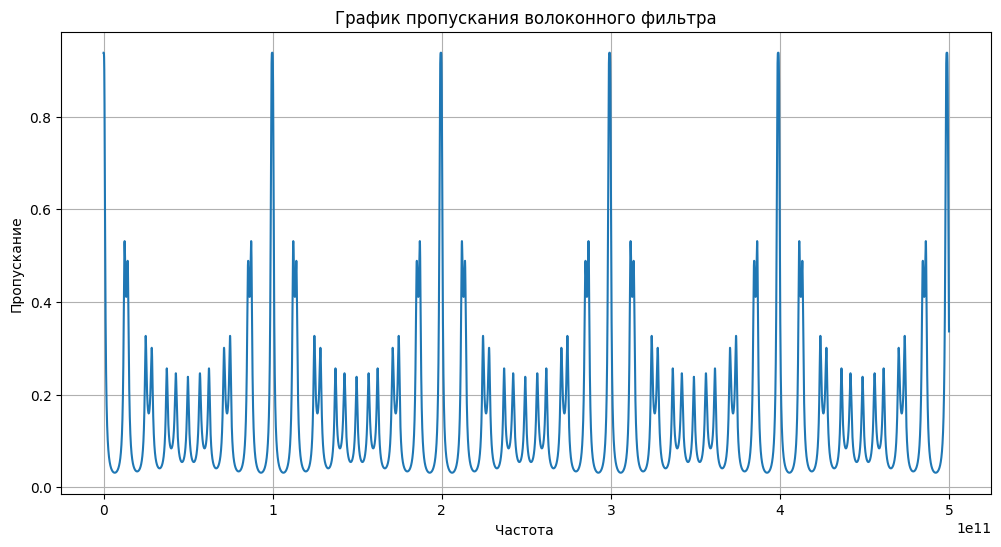

In [31]:
import math
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import find_peaks
#%matplotlib qt 
freq = np.linspace(1.0, 5*10e10, 1000000 )

k1 = k3 = 0.38
k2 = 0.065
l = 14.42e-3
L = 16.48e-3
n = 1.46
c = 3e8
T1 = n*l/c
T2 = n*L/c
α = 1.0
γ1 = np.exp(-α * l)
γ2 = np.exp(-α * L)
N = 7
M = 8
C1 = np.sqrt(1-k1)
C2 = np.sqrt(1-k2)
C3 = np.sqrt(1-k3)

def t_filter_first(w):
    z = np.exp(1j*w*2*np.pi*T1/N)
    return  (1j * np.sqrt(γ1 * γ2 * k1 * k2 * k3) * np.sqrt(z**(-(N + M))))/(1 - C1 * C2 * γ1 * z**(-N) - C2 * C3 * γ2 * z**(-M)\
        + C1 * C3 * γ1 * γ2 * z**(-(N + M)))
def T_filter_first(freq):
    result = []
    for w in freq:
        value = t_filter_first(w)
        result.append(value)
    return np.array(result)
T_values = np.abs(T_filter_first(freq))
plt.figure(figsize=(12, 6))
plt.plot(freq, T_values)
#plt.xlim(100e6, 500e6)
plt.xlabel('Частота ')
plt.ylabel('Пропускание')
plt.title('График пропускания волоконного фильтра')
plt.grid(True)
plt.show()

FWHM в ГГЦ: 1.3765013764986573
FSR в ГГЦ: 97.93259793240208


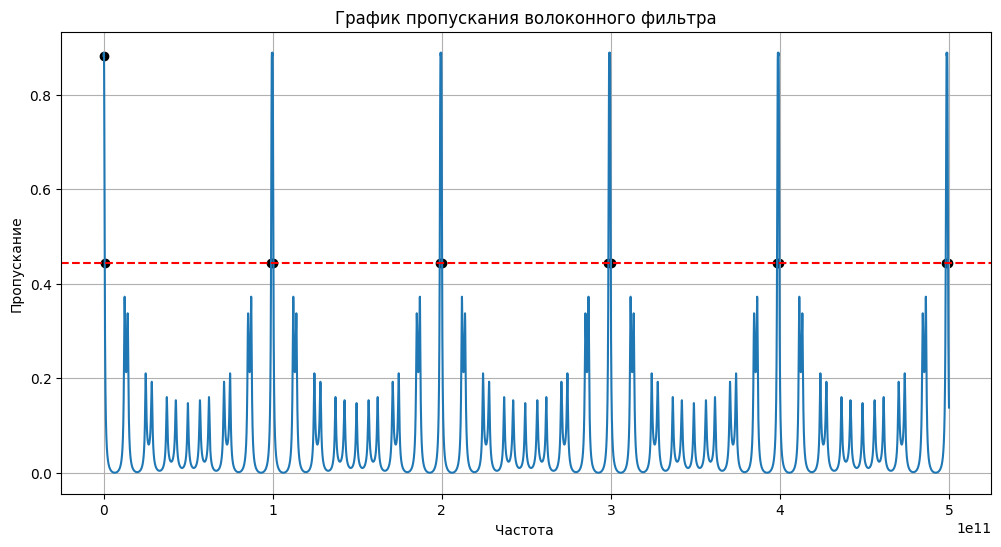

In [33]:
import math
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import find_peaks
#%matplotlib qt 
freq = np.linspace(1.0, 5*10e10, 1000000 )

k1 = k3 = 0.25
k2 = 0.032
l = 14.42e-3
L = 16.48e-3
n = 1.46
c = 3e8
T1 = n*l/c
T2 = n*L/c
α = 1.0
γ1 = np.exp(-α * l)
γ2 = np.exp(-α * L)
N = 7
M = 8
C1 = np.sqrt(1-k1)
C2 = np.sqrt(1-k2)
C3 = np.sqrt(1-k3)
'''Здесь потери на резонансном пике кольцевого резонатора определяются как резонансные потери. \
Значение κ1 должно быть меньше 0,38 для реализации низкого перекрестного искажения менее\
−15  дБ, а κ2 можно рассчитать из соотношения k2 = k1**2/(2-k1**2), в котором κ2 является критическим коэффициентом связи, который \
минимизирует резонансные потери [15] . Частотная характеристика DRR с κ 1  = κ 3 = 0,25, κ 2 = 0,032, при сохранении других \
параметров неизменными, представлена ​​на рис. 6б , на котором вторичные пики значительно подавлены, сохраняя резонансные потери \
на аналогичном уровне по сравнению с рис. 6а . '''
def t_filter_first(w):
    z = np.exp(1j*w*2*np.pi*(T1 / N))
    return  (1j * np.sqrt(γ1 * γ2 * k1 * k2 * k3) * np.sqrt(z**(-(N + M))))/(1 - C1 * C2 * γ1 * z**(-N) - C2 * C3 * γ2 * z**(-M)\
        + C1 * C3 * γ1 * γ2 * z**(-(N + M)))
def T_filter_first(freq):
    result = []
    for w in freq:
        value = t_filter_first(w)
        result.append(value)
    return np.array(result)

T_values = np.abs(T_filter_first(freq))
T_values = T_values - np.min(T_values)
max_amplitude = np.max(T_values)
half_max_amplitude = max_amplitude / 2
# Поиск точек пересечения с половиной максимума
crossings = []
for i in range(len(T_values)):
    if (T_values[i] - half_max_amplitude) * (T_values[i-1] - half_max_amplitude) <= 0:
        crossings.append((freq[i], T_values[i]))
    if i == len(T_values)-1:
        fwhm = abs(crossings[7][0] - crossings[6][0])
        print(f"FWHM в ГГЦ: {fwhm/1e9}")
    #else:
        #print("Не найдено двух пересечений с половиной максимума.")
        
# Поиск пиков
peaks, _ = find_peaks(T_values)
#print(freq[peaks])
#print(T_values[peaks])
# Определение максимального пика
print('FSR в ГГЦ:', (freq[peaks[27]]-freq[peaks[13]])/1e9)
#print('FWHM в МГЦ:', 39.500039499644515)
# Построим график зависимости модуля пропускания от частоты
plt.figure(figsize=(12, 6))
plt.plot(freq, T_values)
plt.axhline(half_max_amplitude, color='r', linestyle='--')  # линия половины максимума
plt.scatter([c[0] for c in crossings], [c[1] for c in crossings], color='k')  # точки пересечения
#plt.xlim(100e6, 500e6)
plt.xlabel('Частота ')
plt.ylabel('Пропускание')
plt.title('График пропускания волоконного фильтра')
plt.grid(True)
plt.show()

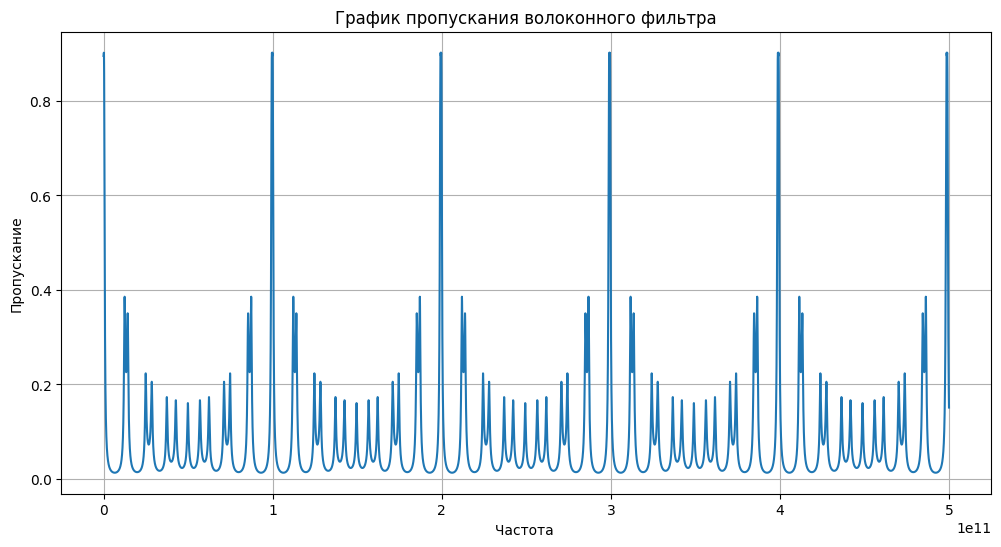

In [36]:
import math
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import find_peaks
#%matplotlib qt 
freq = np.linspace(1.0, 5*10e10, 1000000 )

k1 = k3 = 0.25
k2 = 0.032
l = 14.42e-3
L = 16.48e-3
n = 1.46
c = 3e8
T1 = n*l/c
T2 = n*L/c
α = 1.0
γ1 = np.exp(-α * l)
γ2 = np.exp(-α * L)
N = 7
M = 8
C1 = np.sqrt(1-k1)
C2 = np.sqrt(1-k2)
C3 = np.sqrt(1-k3)

def t_filter_first(w):
    z = np.exp(1j*w*2*np.pi*T1/N)
    return  (1j * np.sqrt(γ1 * γ2 * k1 * k2 * k3) * np.sqrt(z**(-(N + M))))/(1 - C1 * C2 * γ1 * z**(-N) - C2 * C3 * γ2 * z**(-M)\
        + C1 * C3 * γ1 * γ2 * z**(-(N + M)))
def T_filter_first(freq):
    result = []
    for w in freq:
        value = t_filter_first(w)
        result.append(value)
    return np.array(result)
T_values = np.abs(T_filter_first(freq))
plt.figure(figsize=(12, 6))
plt.plot(freq, T_values)
#plt.xlim(100e6, 500e6)
plt.xlabel('Частота ')
plt.ylabel('Пропускание')
plt.title('График пропускания волоконного фильтра')
plt.grid(True)
plt.show()